<a href="https://colab.research.google.com/github/wudiubaobao/assessment-2/blob/main/Yeonjung_Choi_assignmennt2_ZUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Working in a group of three, analyse the Australian Energy dataset using Python in Google Colab notebooks to understand SQLite databases, data exploration, data visualization, and applying industry best practices in programming.

Create two notebooks:

a business report (which includes code, analysis, and discussion) and a development notebook, which includes pseudocode, testing, and any other industry best practice not observable from the business report.

# Import libraries

First, we uploaded the original database, “AUS_energy_sqlite3.db”. Then we import the four libraries we need to work with the code. The four libraries are shown below.

1. Sqlite3: A fast and lightweight file-based relational database system
2. Pandas: A Python library for working with and analyzing data, providing a useful data structure called a dataframe.
3. Numpy: A Python library for working quickly with arrays and linear algebra.
4. Matplotlib.pyplot: A Python library for creating charts, graphs, and other 2D data visualizations.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

Loading the data -
connect to the provided SQLite database using the SQLite3 library

In [2]:
# Connect to 'AUS_energy_sqlite.3.db' database
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# Query to retreive table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fatch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the connection when done
conn.close()

AUS_energy


# Viewing the data structure

# Data Exploration

In [3]:
# Connect to the sqlite database
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# Specify the table name for which you want to retrieve column names
table_name = 'AUS_energy'

# Query to retrieve column names
cursor.execute("PRAGMA table_info({})".format(table_name))

# Fetch all column names
columns = cursor.fetchall()

# Print the column names
for column in columns:
    print(column[1])

# Close the connection when done
conn.close()

Year
State
Coal (PJ)
Oil (PJ)
Gas (PJ)
Renewables (PJ)
Population
GSP ($ million)


In [4]:
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

table_name = 'AUS_energy'
# sql syntax select (column list) from (table name)
cursor.execute("SELECT * FROM AUS_energy")
rows = cursor.fetchall()

# Close the connection when done
conn.close()
rows

[('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695),
 ('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532),
 ('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579),
 ('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526),
 ('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174),
 ('2008-09', 'TAS', 12.4, 41.6, 11.2, 37.1, 504353, 28165),
 ('2008-09', 'NT', '', 54.8, 39.9, 0.4, 226027, 19562),
 ('2009-10', 'WA', 125.6, 290.0, 474.9, 14.6, 2290845, 259326),
 ('2009-10', 'NSW', 771.8, 638.9, 148.7, 63.8, 7506058, 539670),
 ('2009-10', 'VIC', 688.7, 448.4, 263.5, 36.0, 5461101, 372276),
 ('2009-10', 'QLD', 547.5, 466.9, 195.8, 107.4, 4404744, 290556),
 ('2009-10', 'SA', 79.7, 120.5, 119.5, 20.4, 1627322, 102303),
 ('2009-10', 'TAS', 11.5, 41.5, 13.6, 40.0, 508847, 28402),
 ('2009-10', 'NT', '', 51.9, 42.0, 0.5, 229778, 19469),
 ('2010-11', 'WA', 130.6, 341.5, 494.9, 15.3, 2353409, 271336),
 ('2010-11', 'NSW', 732.2, 685.0, 146.5, 68.6, 7586514, 550

# Load the database into a Pandas Dataframe

In [5]:
# Use Pandas to load the query results into data frames
# Given dataset
data = rows

# Define column names
columns = ['Year','State','Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)','Population','GSP($ milion)']

# Create a list of dictionaries where each dictionary represents a row of data
data_dict = [{columns[i]: row[i] for i in range(len(columns))} for row in data]

# Create a Pandas Dataframe
df = pd.DataFrame(data_dict)

# Print the DataFrame
df

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


In [6]:
# Look at the first 10 rows of the dataframe
df.head(10)

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
5,2008-09,TAS,12.4,41.6,11.2,37.1,504353,28165
6,2008-09,NT,,54.8,39.9,0.4,226027,19562
7,2009-10,WA,125.6,290.0,474.9,14.6,2290845,259326
8,2009-10,NSW,771.8,638.9,148.7,63.8,7506058,539670
9,2009-10,VIC,688.7,448.4,263.5,36.0,5461101,372276


In [7]:
# Look at the last 10 rows of the dataframe
df.tail(10)

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
88,2020-21,SA,25.4,143.3,92.2,44.3,1802601,118271
89,2020-21,TAS,8.1,40.0,7.3,43.4,567239,35195
90,2020-21,NT,,37.6,106.2,1.5,248151,24890
91,2021-22,WA,121.1,422.5,673.1,41.2,2789148,377257
92,2021-22,NSW,534.6,547.2,145.3,125.4,8622575,706003
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [ ]:
# General overview of the structure and content of dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            98 non-null     object 
 1   State           98 non-null     object 
 2   Coal(PJ)        98 non-null     object 
 3   Oil(PJ)         98 non-null     float64
 4   Gas(PJ)         98 non-null     float64
 5   Renewables(PJ)  98 non-null     float64
 6   Population      98 non-null     int64  
 7   GSP($ milion)   98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [8]:
# Outputs summary information about dataframe
df.describe()

,Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


In [12]:
df.dtypes

Year               object
State              object
Coal(PJ)           object
Oil(PJ)           float64
Gas(PJ)           float64
Renewables(PJ)    float64
Population          int64
GSP($ milion)       int64
dtype: object

# Data cleasing

# Discovering inappropriate data

In [13]:
# Check for duplicates based on all columns
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

In [14]:
# Check for missing values
df.isnull().head()

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [15]:
# Check for missing values in each row
null_records = df.isnull().any(axis=1)
df[null_records]

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)


In [16]:
# Check for missing data in the DataFrame
#missing_data = df.isnull().sum()
missing_data = (df== '').sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_data)


Number of missing values in each column:
Year               0
State              0
Coal(PJ)          14
Oil(PJ)            0
Gas(PJ)            0
Renewables(PJ)     0
Population         0
GSP($ milion)      0
dtype: int64


In [17]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None) # Show all rows
pd.set_option('display.max_columns',None) # Show all columns

# Print the entire DataFrame
print(df)


       Year State Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
0   2008-09    WA    132.9    294.3    474.7            15.6     2240250   
1   2008-09   NSW    800.9    587.5    131.6            54.7     7408540   
2   2008-09   VIC    695.3    432.9    273.5            33.6     5371934   
3   2008-09   QLD    629.2    469.5    187.9            77.4     4328771   
4   2008-09    SA     80.2    120.2    134.0            21.2     1608902   
5   2008-09   TAS     12.4     41.6     11.2            37.1      504353   
6   2008-09    NT              54.8     39.9             0.4      226027   
7   2009-10    WA    125.6    290.0    474.9            14.6     2290845   
8   2009-10   NSW    771.8    638.9    148.7            63.8     7506058   
9   2009-10   VIC    688.7    448.4    263.5            36.0     5461101   
10  2009-10   QLD    547.5    466.9    195.8           107.4     4404744   
11  2009-10    SA     79.7    120.5    119.5            20.4     1627322   
12  2009-10 

''' **Gen AI prompt**: how to handle of empty values of 'Coal(PJ)'?

**Gen AI response**: If there are empty values, you'll need to decide how to handle them. Here are some common options:

***Drop rows with empty values***: You can use the .dropna() method to remove rows with missing values in any column, or you can specify the column name ('Coal(PJ)' in your case) as an argument.

***Impute empty values***: You can estimate the empty values based on other columns in your DataFrame using techniques like mean/median imputation or more sophisticated methods.

***Fill with Median***: You can fill empty values with the median of the column. This approach is suitable when the empty values are randomly distributed and the column follows a normal distribution. median_coal = df['Coal(PJ)'].median() df['Coal(PJ)'].fillna(median_coal, inplace=True)

### ***Why I choice median for filling empty value*** :
When data is sorted in ascending order, the value that falls in the middle is called the median. Since the median is unaffected by extreme numbers, it is a more reliable method than the mean for expressing the data's central trend. Furthermore, if there are more empty values than half of the total number of data points, the median cannot be determined. The mean value, which is greatly influenced by the extreme values, may not correctly reflect the underlying central tendency of the data if there are extreme values present. Furthermore, the mean value may be biased if there are many empty values, which means that the mean value of the data with empty values may differ from the mean value of the complete data. For these reasons, if your data contains extreme values or a large number of empty values, we advise utilizing the median. In order to calculate the total energy consumption by fuel type, we thought it would be more accurate to compare via median rather than removing values.

**Gen AI Response Effectives**: Before visualizing the total energy consumption, we need to handle empty values in the 'Coal (PJ)' column. we can fill in the empty values with an appropriate value, such as the median of the column.

**Modification Needed**: The error message indicates that there's a problem with computing the mean of the 'Coal(PJ)' column, likely because some values in the column are of string type, which cannot be directly used in arithmetic operations. To fix this error, you need to ensure that all values in the 'Coal(PJ)' column are numeric before calculating the mean. You can do this by converting the column to a numeric data type using pd.to_numeric(). '''

In [18]:
# Convert 'Coal(PJ)' column to numeric, coercing errors to NaN
df['Coal(PJ)'] = pd.to_numeric(df['Coal(PJ)'], errors='coerce')

# Calculate the median of the 'Coal(PJ)' column
median_coal = df['Coal(PJ)'].median()

# Fill missing values in the 'Coal(PJ)' column with the mean value
df['Coal(PJ)'].fillna(median_coal, inplace=True)

# Verify that missing values have been filled
print("Number of missing values in 'Coal(PJ)' column after filling:", df['Coal(PJ)'].isnull().sum())


Number of missing values in 'Coal(PJ)' column after filling: 0


In [19]:
# confirm the no missing values
print(df['Coal(PJ)'].unique())

[132.9 800.9 695.3 629.2  80.2  12.4 278.3 125.6 771.8 688.7 547.5  79.7
  11.5 130.6 732.2 681.2 497.2  72.6  10.1 125.  692.7 705.7 481.5  60.9
   8.9 129.8 643.  622.  473.4  50.7  12.  136.1 603.5 605.6 442.9  46.7
  11.  127.6 587.8 641.2 485.3  54.   11.3 136.4 620.9 617.4 517.8  52.6
   9.7 145.9 625.9 577.3 544.2  26.1  10.7 136.2 636.7 467.4 570.6  25.9
  10.5 126.8 640.3 444.1 554.2  26.3  10.  119.5 606.6 423.2 524.4  24.7
   8.3 114.3 579.8 427.7 506.1  25.4   8.1 121.1 534.6 410.7 485.6   8.8]


In [20]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None) # Show all rows
pd.set_option('display.max_columns',None) # Show all columns

# Print the entire DataFrame
print(df)

       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
0   2008-09    WA     132.9    294.3    474.7            15.6     2240250   
1   2008-09   NSW     800.9    587.5    131.6            54.7     7408540   
2   2008-09   VIC     695.3    432.9    273.5            33.6     5371934   
3   2008-09   QLD     629.2    469.5    187.9            77.4     4328771   
4   2008-09    SA      80.2    120.2    134.0            21.2     1608902   
5   2008-09   TAS      12.4     41.6     11.2            37.1      504353   
6   2008-09    NT     278.3     54.8     39.9             0.4      226027   
7   2009-10    WA     125.6    290.0    474.9            14.6     2290845   
8   2009-10   NSW     771.8    638.9    148.7            63.8     7506058   
9   2009-10   VIC     688.7    448.4    263.5            36.0     5461101   
10  2009-10   QLD     547.5    466.9    195.8           107.4     4404744   
11  2009-10    SA      79.7    120.5    119.5            20.4     1627322   

In [21]:
# Grouping by state
grouped_by_state = df.groupby('State')

for name, group in grouped_by_state:
  # Print group information (name is the state)
  print(f"State: {name}")
  print(group)  # Print the entire DataFrame for this state
  print("-"*20)  # Separator between states

State: NSW
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
1   2008-09   NSW     800.9    587.5    131.6            54.7     7408540   
8   2009-10   NSW     771.8    638.9    148.7            63.8     7506058   
15  2010-11   NSW     732.2    685.0    146.5            68.6     7586514   
22  2011-12   NSW     692.7    687.4    142.1            71.1     7680783   
29  2012-13   NSW     643.0    677.4    157.4            70.9     7787289   
36  2013-14   NSW     603.5    666.6    167.0            72.8     7897152   
43  2014-15   NSW     587.8    621.4    163.5            71.0     8011981   
50  2015-16   NSW     620.9    633.6    164.8            82.4     8135962   
57  2016-17   NSW     625.9    652.6    143.6            84.5     8270362   
64  2017-18   NSW     636.7    672.4    144.1            86.6     8380557   
71  2018-19   NSW     640.3    665.0    139.2            90.4     8482478   
78  2019-20   NSW     606.6    611.4    141.9            95.6    

In [22]:
# Grouping by fuel type
grouped_by_fuel = df.groupby(['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)'])

# Explore the grouped data
for fuel_group in grouped_by_fuel:
  print(fuel_group[0])  # Access the group key (fuel consumption values)
  print(fuel_group[1])  # Access the DataFrame for that group (rows with matching consumption)
  print("-"*20)


(8.1, 40.0, 7.3, 43.4)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
89  2020-21   TAS       8.1     40.0      7.3            43.4      567239   

    GSP($ milion)  
89          35195  
--------------------
(8.3, 37.3, 7.4, 47.4)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
82  2019-20   TAS       8.3     37.3      7.4            47.4      557578   

    GSP($ milion)  
82          33521  
--------------------
(8.8, 39.9, 7.1, 48.1)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
96  2021-22   TAS       8.8     39.9      7.1            48.1      571013   

    GSP($ milion)  
96          36701  
--------------------
(8.9, 38.1, 16.2, 39.8)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
26  2011-12   TAS       8.9     38.1     16.2            39.8      511724   

    GSP($ milion)  
26          29644  
--------------------
(9.7, 38.1, 12.9, 40.9)
       Year State  

In [23]:
# Apply these functions to the grouped data to get aggregated values.
# Calculate consumption by state
energy_consumption = df.groupby('State')[['Coal(PJ)','Oil(PJ)','Gas(PJ)' ,'Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption = energy_consumption.reset_index()

# Print the result
print(energy_consumption)

  State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
0   NSW    9076.7   8902.4   2071.5          1148.4
1    NT    3896.2    628.7    862.0            11.6
2   QLD    7259.9   7338.6   3747.1          1633.6
3    SA     651.7   1857.7   1549.7           448.3
4   TAS     143.3    545.7    167.8           618.2
5   VIC    8007.5   6580.6   3608.3           865.1
6    WA    1807.8   5276.3   8043.2           329.7


In [24]:
# Grouping by fuel
energy_consumption1 = df.groupby('Year')[['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption1 = energy_consumption1.reset_index()

# Print the result
print(energy_consumption1)


       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
0   2008-09    2629.2   2000.8   1252.8           240.0
1   2009-10    2503.1   2058.1   1258.0           282.7
2   2010-11    2402.2   2212.0   1274.2           294.7
3   2011-12    2353.0   2184.2   1338.6           293.8
4   2012-13    2209.2   2278.0   1376.5           333.5
5   2013-14    2124.1   2297.2   1383.8           344.4
6   2014-15    2185.5   2236.7   1407.0           347.6
7   2015-16    2233.1   2279.5   1440.3           360.2
8   2016-17    2208.4   2318.0   1477.7           379.1
9   2017-18    2125.6   2404.0   1534.5           382.5
10  2018-19    2080.0   2424.5   1561.9           400.3
11  2019-20    1985.0   2251.5   1623.8           418.7
12  2020-21    1939.7   2082.0   1561.0           464.6
13  2021-22    1865.0   2103.5   1559.5           512.8


In [ ]:
# Grouping by fuel type
grouped_by_fuel = energy_consumption1.groupby(['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)'])

# Explore the grouped data
for fuel_group in grouped_by_fuel:
  print(fuel_group[0])  # Access the group key (fuel consumption values)
  print(fuel_group[1])  # Access the DataFrame for that group (rows with matching consumption)
  print("-" * 20)

(1865.0, 2103.5, 1559.5, 512.8)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
13  2021-22    1865.0   2103.5   1559.5           512.8
--------------------
(1939.6999999999998, 2082.0, 1561.0, 464.59999999999997)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
12  2020-21    1939.7   2082.0   1561.0           464.6
--------------------
(1985.0, 2251.5, 1623.8, 418.7)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
11  2019-20    1985.0   2251.5   1623.8           418.7
--------------------
(2080.0, 2424.5, 1561.8999999999999, 400.3)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
10  2018-19    2080.0   2424.5   1561.9           400.3
--------------------
(2124.1, 2297.2000000000003, 1383.8, 344.4)
      Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
5  2013-14    2124.1   2297.2   1383.8           344.4
--------------------
(2125.6, 2404.0, 1534.5, 382.5)
      Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
9  2017-18    2125.6   2404.0   1534.5   

In [25]:
# Grouping by fuel
energy_consumption2 = df.groupby(['Year','State'])[['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption2 = energy_consumption2.reset_index()

# Print the result
print(energy_consumption2)

       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
0   2008-09   NSW     800.9    587.5    131.6            54.7
1   2008-09    NT     278.3     54.8     39.9             0.4
2   2008-09   QLD     629.2    469.5    187.9            77.4
3   2008-09    SA      80.2    120.2    134.0            21.2
4   2008-09   TAS      12.4     41.6     11.2            37.1
5   2008-09   VIC     695.3    432.9    273.5            33.6
6   2008-09    WA     132.9    294.3    474.7            15.6
7   2009-10   NSW     771.8    638.9    148.7            63.8
8   2009-10    NT     278.3     51.9     42.0             0.5
9   2009-10   QLD     547.5    466.9    195.8           107.4
10  2009-10    SA      79.7    120.5    119.5            20.4
11  2009-10   TAS      11.5     41.5     13.6            40.0
12  2009-10   VIC     688.7    448.4    263.5            36.0
13  2009-10    WA     125.6    290.0    474.9            14.6
14  2010-11   NSW     732.2    685.0    146.5            68.6
15  2010

# Data Analysis

# We've selected two questions from Group A, as shown below.

1. Compute and visualize the total energy consumption for each state.
2. Compute and visualize the total energy consumption by fuel type.

# **Group A**
 1. Compute and visualize the total energy consumption for each state.

In [26]:
energy_consumption

,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ)
0,NSW,9076.7,8902.4,2071.5,1148.4
1,NT,3896.2,628.7,862.0,11.6
2,QLD,7259.9,7338.6,3747.1,1633.6
3,SA,651.7,1857.7,1549.7,448.3
4,TAS,143.3,545.7,167.8,618.2
5,VIC,8007.5,6580.6,3608.3,865.1
6,WA,1807.8,5276.3,8043.2,329.7


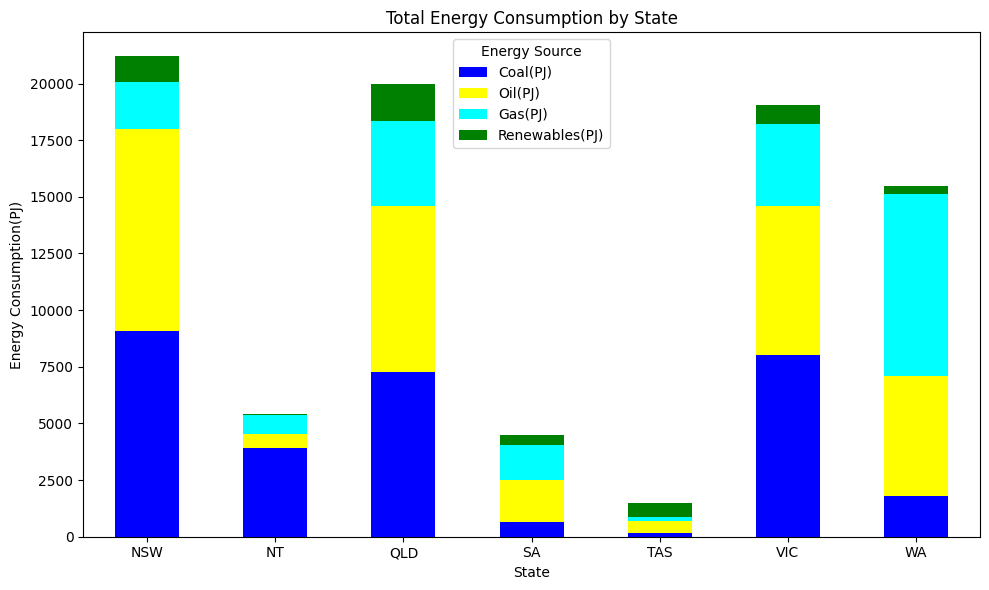

In [27]:
# Group by 'State' and sum up energy consumption across different sources
energy_consumption = df.groupby('State')[['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)' ]].sum()

# Define a color list for different fuel types
colors = ['blue', 'yellow', 'aqua', 'green']

# Visualize total energy consumption for each state
ax = energy_consumption.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the plot further (optional)
plt.title('Total Energy Consumption by State')
plt.xlabel('State')
plt.ylabel('Energy Consumption(PJ)')
plt.xticks(rotation=0)
plt.legend(title='Energy Source')
plt.tight_layout()

plt.show()


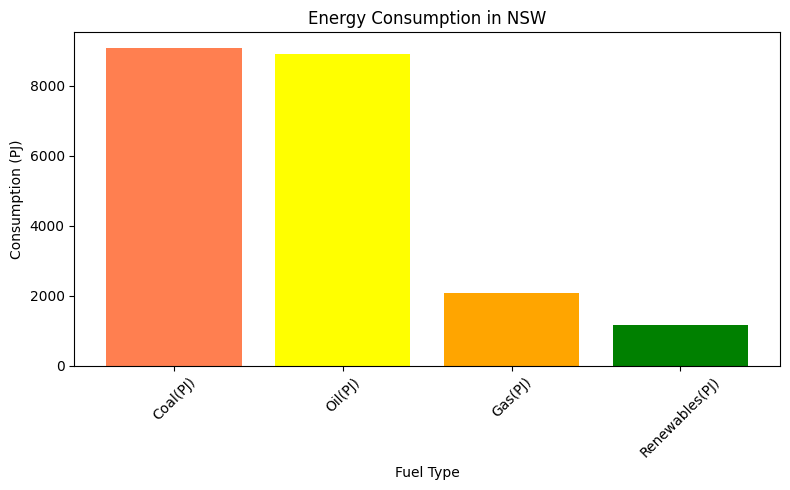

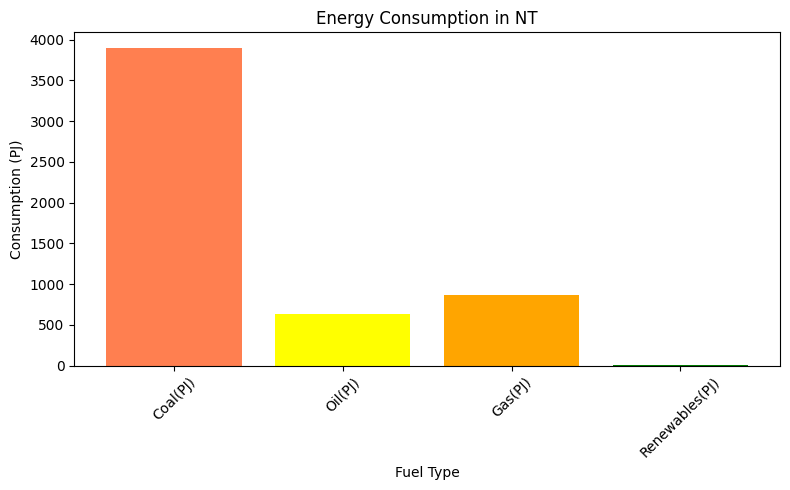

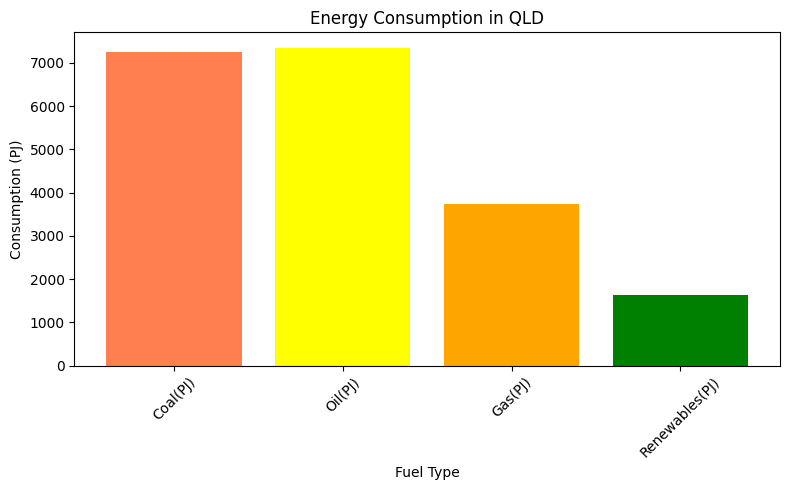

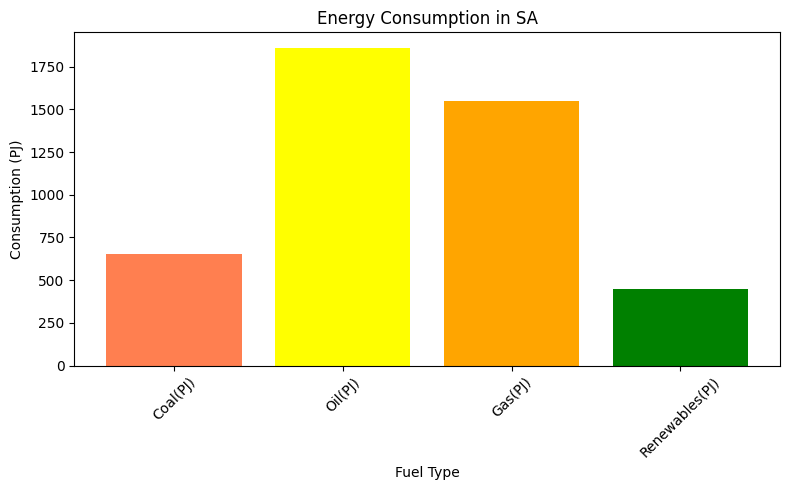

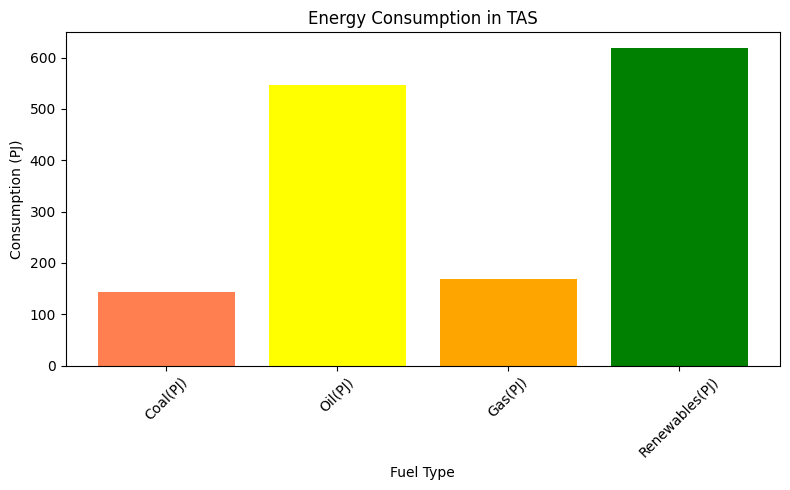

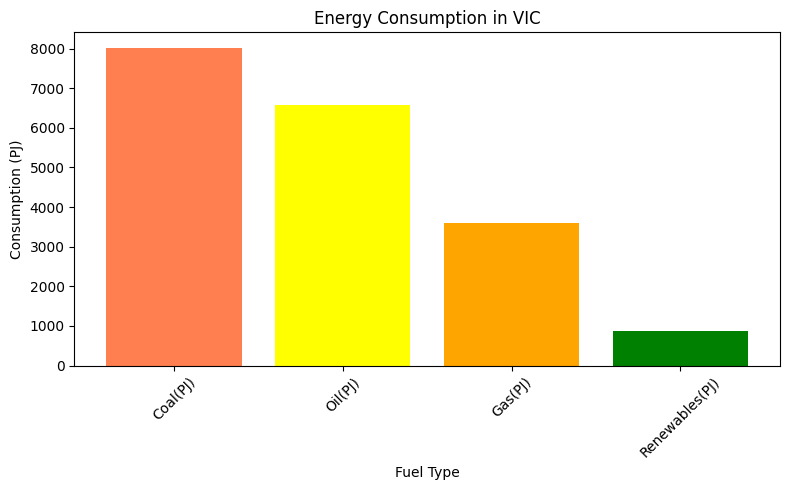

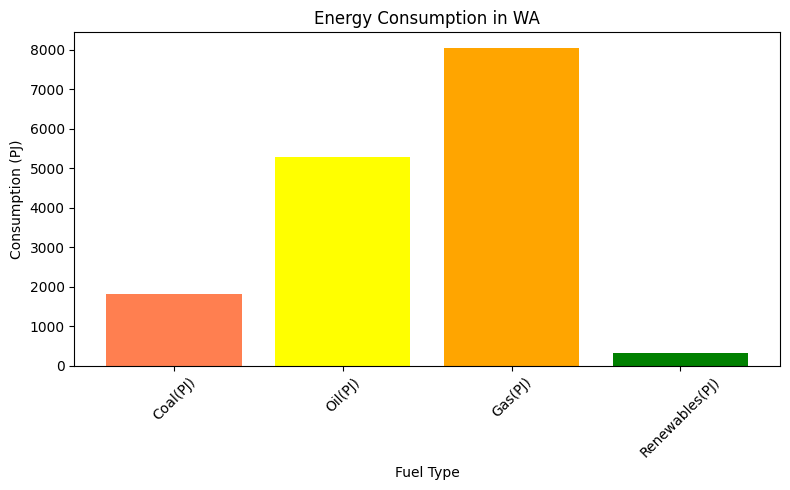

In [28]:
# Define a color list for different fuel types
colors = ['coral', 'yellow', 'orange', 'green']

# Loop through each state (row) in the grouped data
for state, row in energy_consumption.iterrows():
  # Extract fuel types and their consumption values
  fuel_types = row.index.to_list()  # Convert index to list using .tolist()
  consumption_values = row.to_numpy()

  # Create a new figure for each state's histogram
  plt.figure(figsize=(8, 5))

  # Use 'color' argument in plt.bar to assign colors
  plt.bar(fuel_types, consumption_values, color=colors)
  plt.title(f"Energy Consumption in {state}")
  plt.xlabel("Fuel Type")
  plt.ylabel("Consumption (PJ)")
  plt.xticks(rotation=45)
  plt.tight_layout()

  # Display the histogram for the current state
  plt.show()

# **Group A**
 2. Compute and visualize the total energy consumption by fuel type.

In [29]:
energy_consumption1

,Year,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ)
0,2008-09,2629.2,2000.8,1252.8,240.0
1,2009-10,2503.1,2058.1,1258.0,282.7
2,2010-11,2402.2,2212.0,1274.2,294.7
3,2011-12,2353.0,2184.2,1338.6,293.8
4,2012-13,2209.2,2278.0,1376.5,333.5
5,2013-14,2124.1,2297.2,1383.8,344.4
6,2014-15,2185.5,2236.7,1407.0,347.6
7,2015-16,2233.1,2279.5,1440.3,360.2
8,2016-17,2208.4,2318.0,1477.7,379.1
9,2017-18,2125.6,2404.0,1534.5,382.5


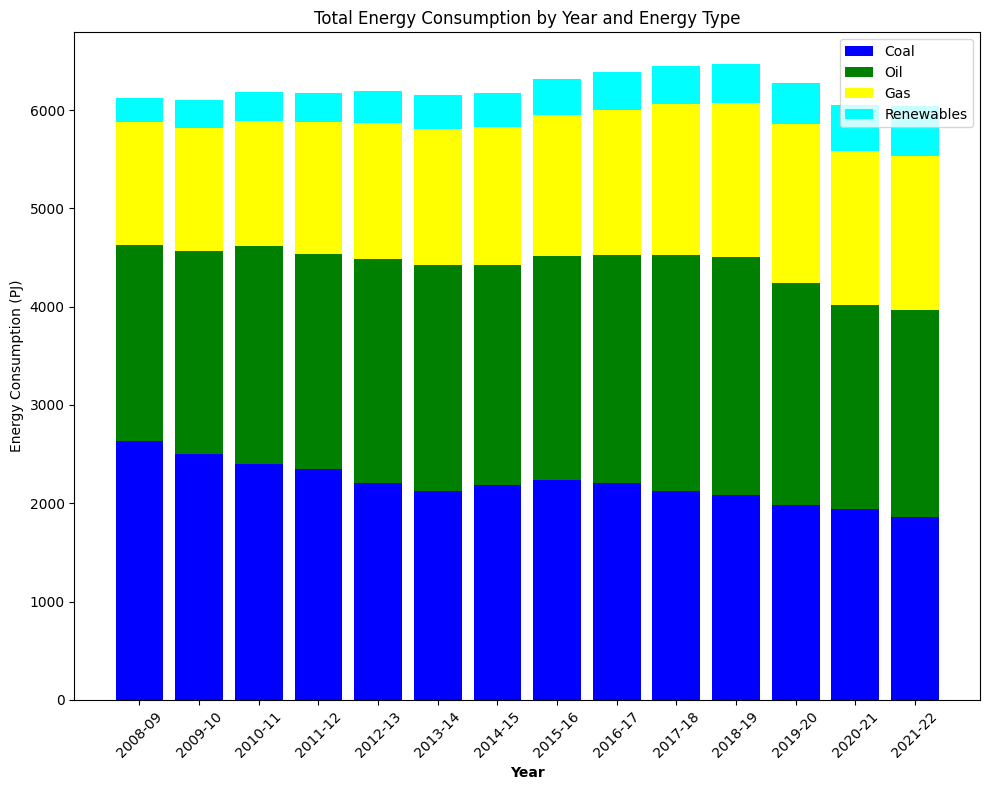

In [30]:
# Group by year and sum the values for each fuel type
grouped_by_year = df.groupby('Year').sum().reset_index()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Define the x-axis (years)
years = grouped_by_year['Year']

# Plot the stacked bars
ax.bar(years, grouped_by_year['Coal(PJ)'], color='b', label='Coal')
ax.bar(years, grouped_by_year['Oil(PJ)'], bottom=grouped_by_year['Coal(PJ)'], color='g', label='Oil')
ax.bar(years, grouped_by_year['Gas(PJ)'], bottom=grouped_by_year['Coal(PJ)'] + grouped_by_year['Oil(PJ)'],
       color='yellow', label='Gas')
ax.bar(years, grouped_by_year['Renewables(PJ)'],
       bottom=grouped_by_year['Coal(PJ)'] + grouped_by_year['Oil(PJ)'] + grouped_by_year['Gas(PJ)'],
       color='cyan', label='Renewables')

# Add labels and title
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Energy Consumption (PJ)')
ax.set_title('Total Energy Consumption by Year and Energy Type')
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

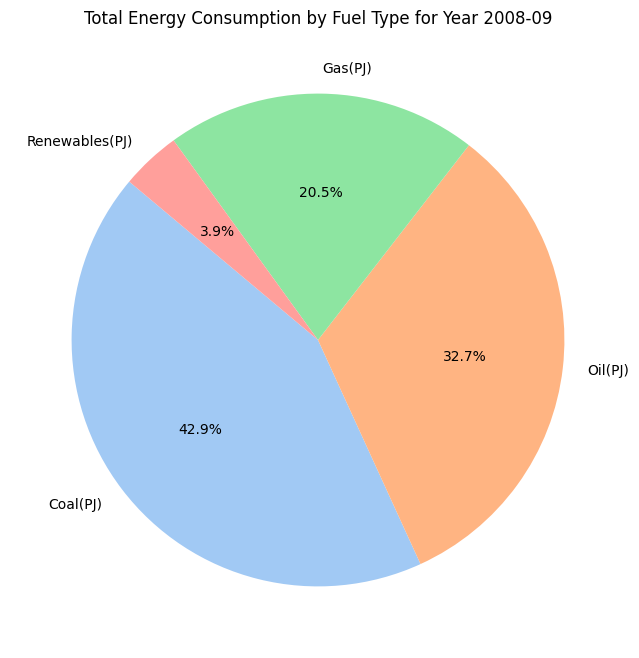

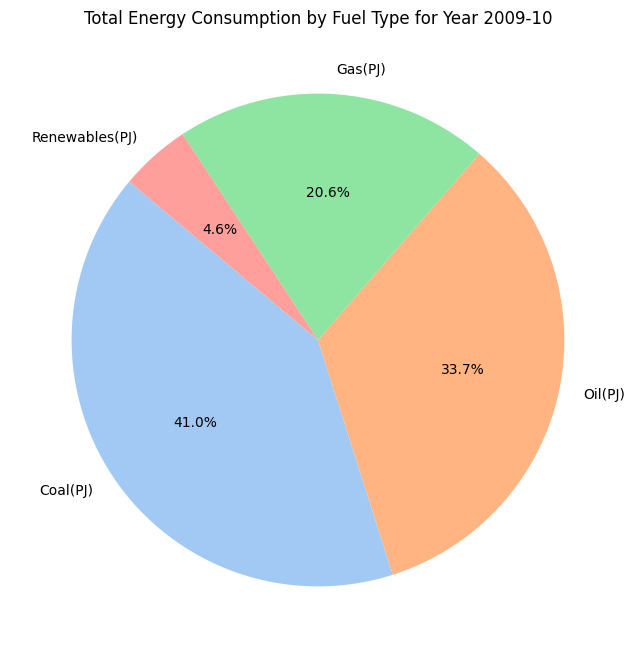

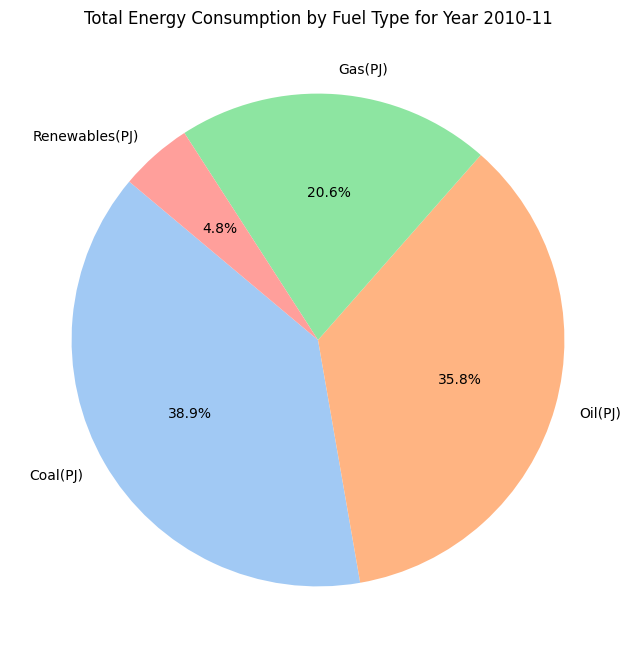

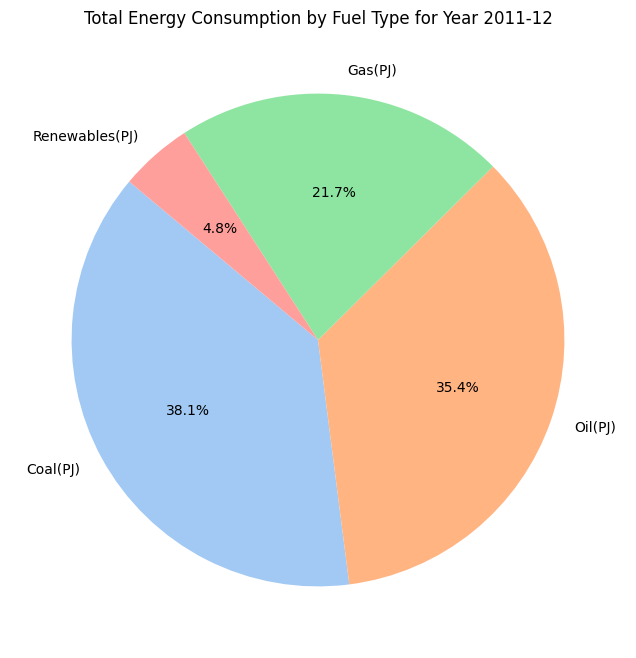

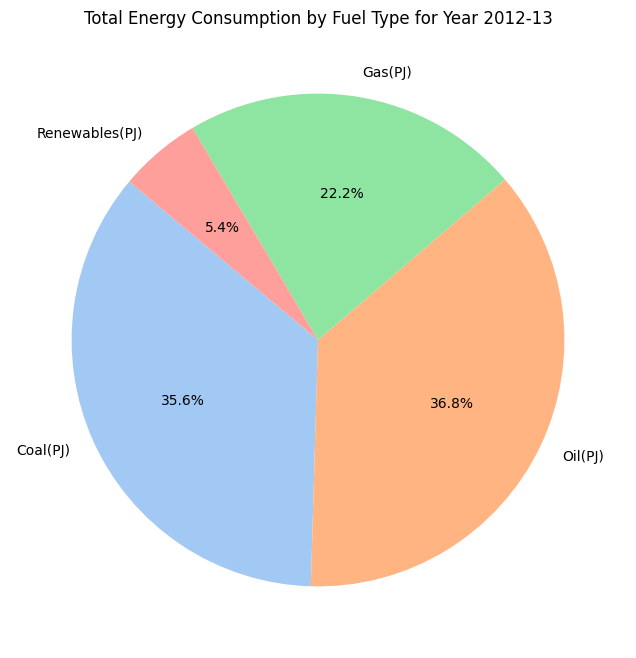

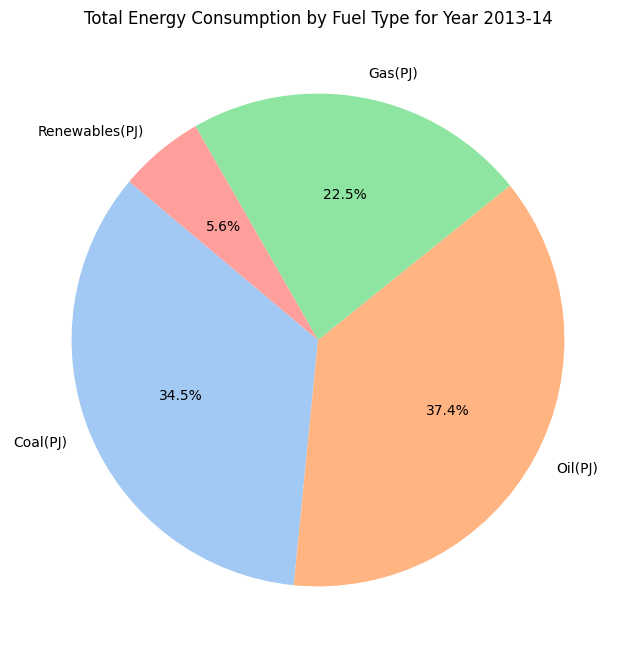

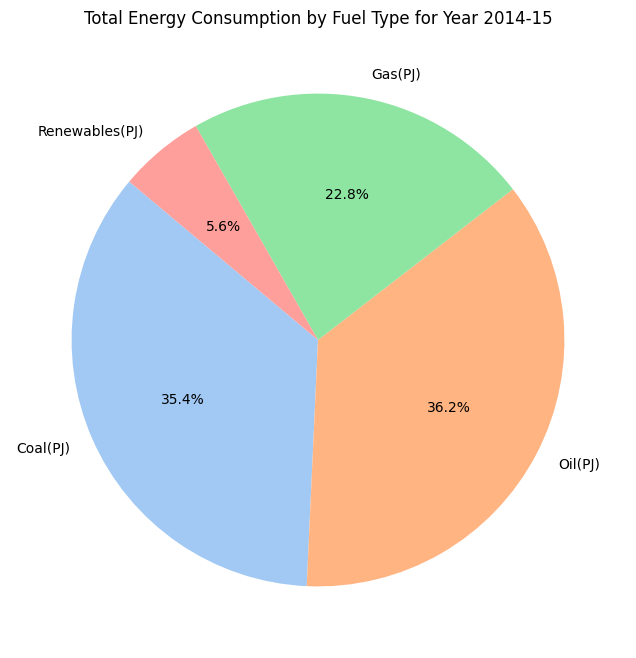

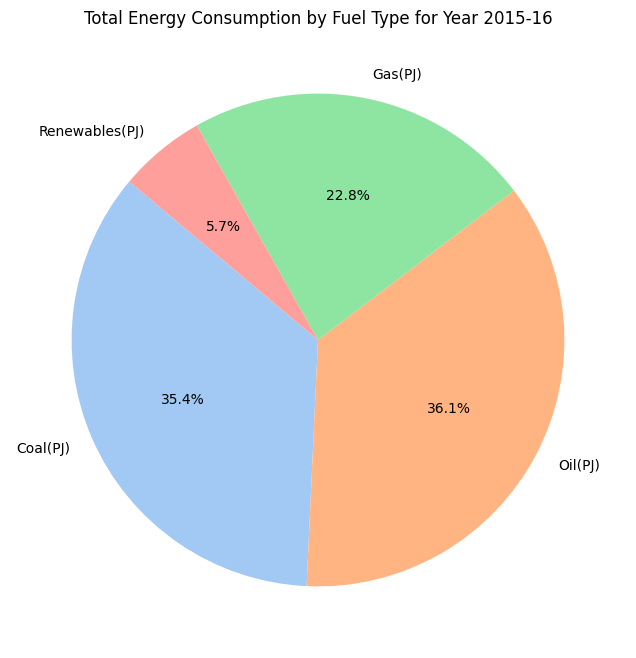

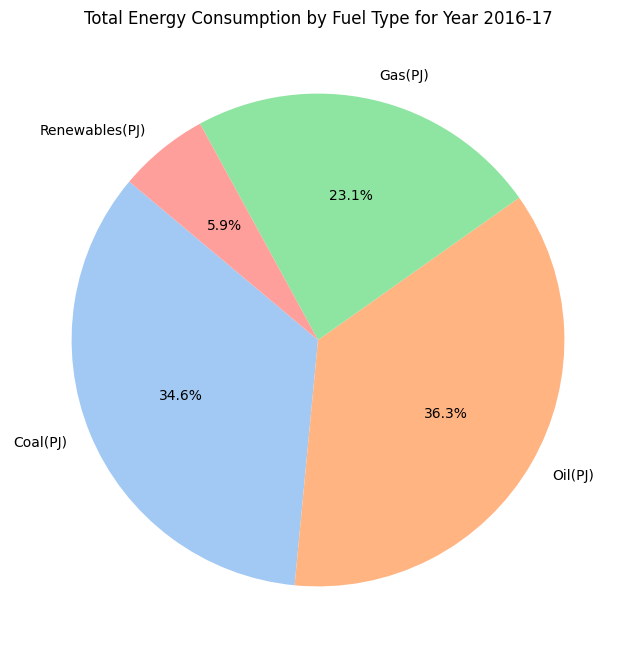

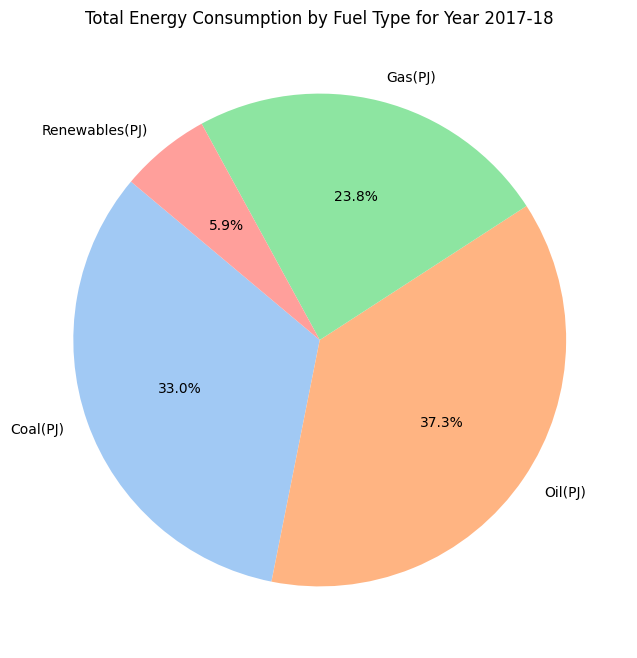

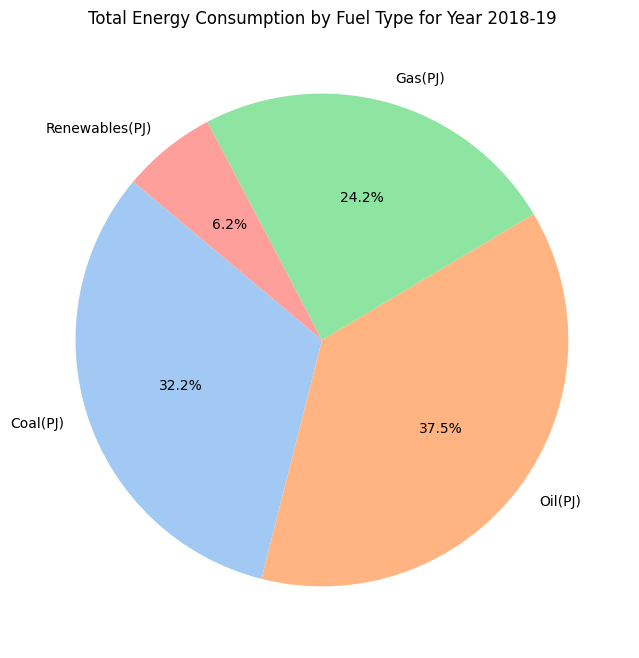

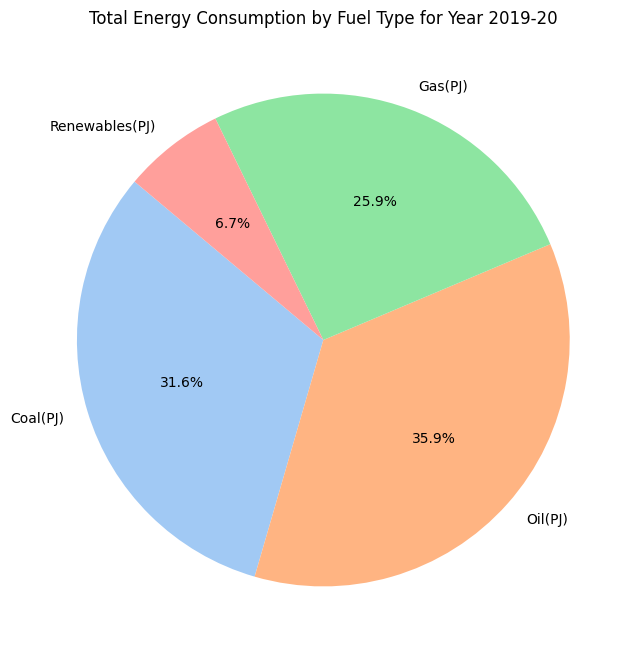

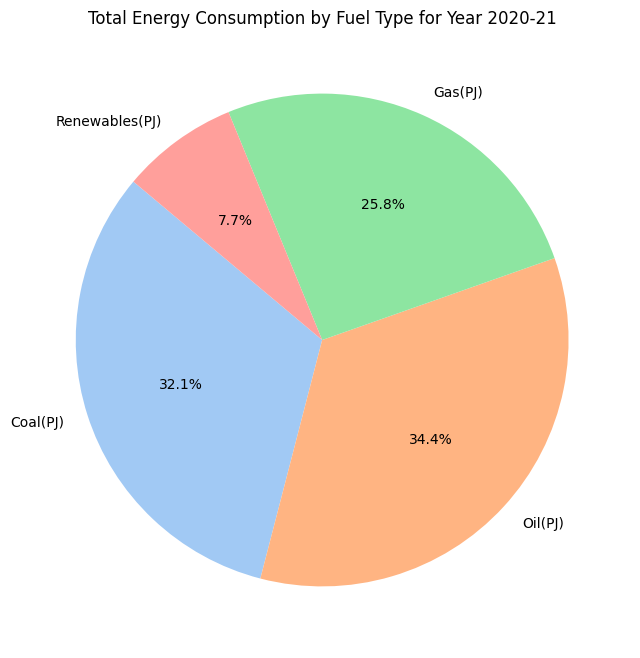

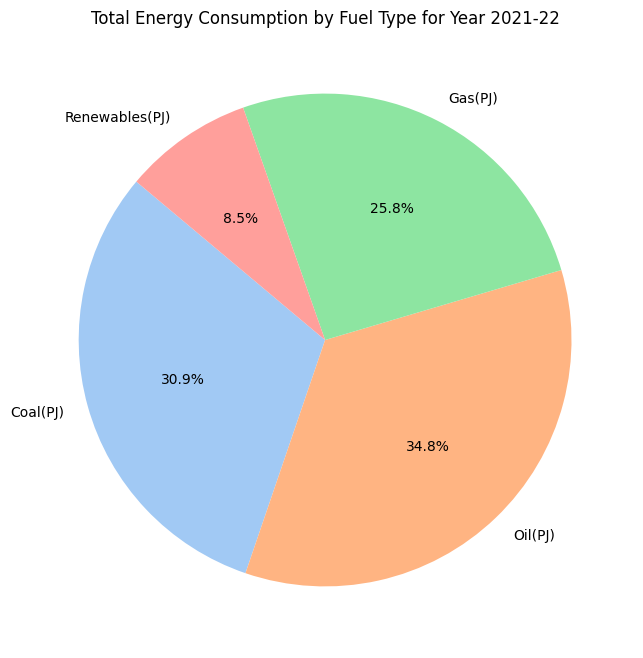

In [31]:
# Chaning the pastel colors from seaborn palette
import seaborn as sns

# Define a custom color palette
colors = sns.color_palette('pastel')

# Group by year and sum the energy consumption for each fuel type
total_energy_by_year = energy_consumption2.groupby('Year')[['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']].sum()

# Plot a pie chart for each year
for year, row in total_energy_by_year.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Total Energy Consumption by Fuel Type for Year {year}')
    plt.show()


# Data Analysis
## GROUP C

### .Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures

**I wasn't sure if I needed to plot the graphs separately or put each state's energy intensity in one line graph, so I made both**

This problem is to analyze the annual energy intensity of each state and draw related graphs. According to the assignment requirements, energy intensity is equal to energy consumption divided by DSP.there is no colum called"energy intensity",it need to be calculated by the formula below:

energy intensity(PJ/milliom)=energy consumption(PJ)/GSP(million)

input=energy intensity(PJ/million)

output=broken line graph

source: 1. https://www.geeksforgeeks.org/python-pandas-pivot_table/?ref=header_search

source: 2.chatgpt



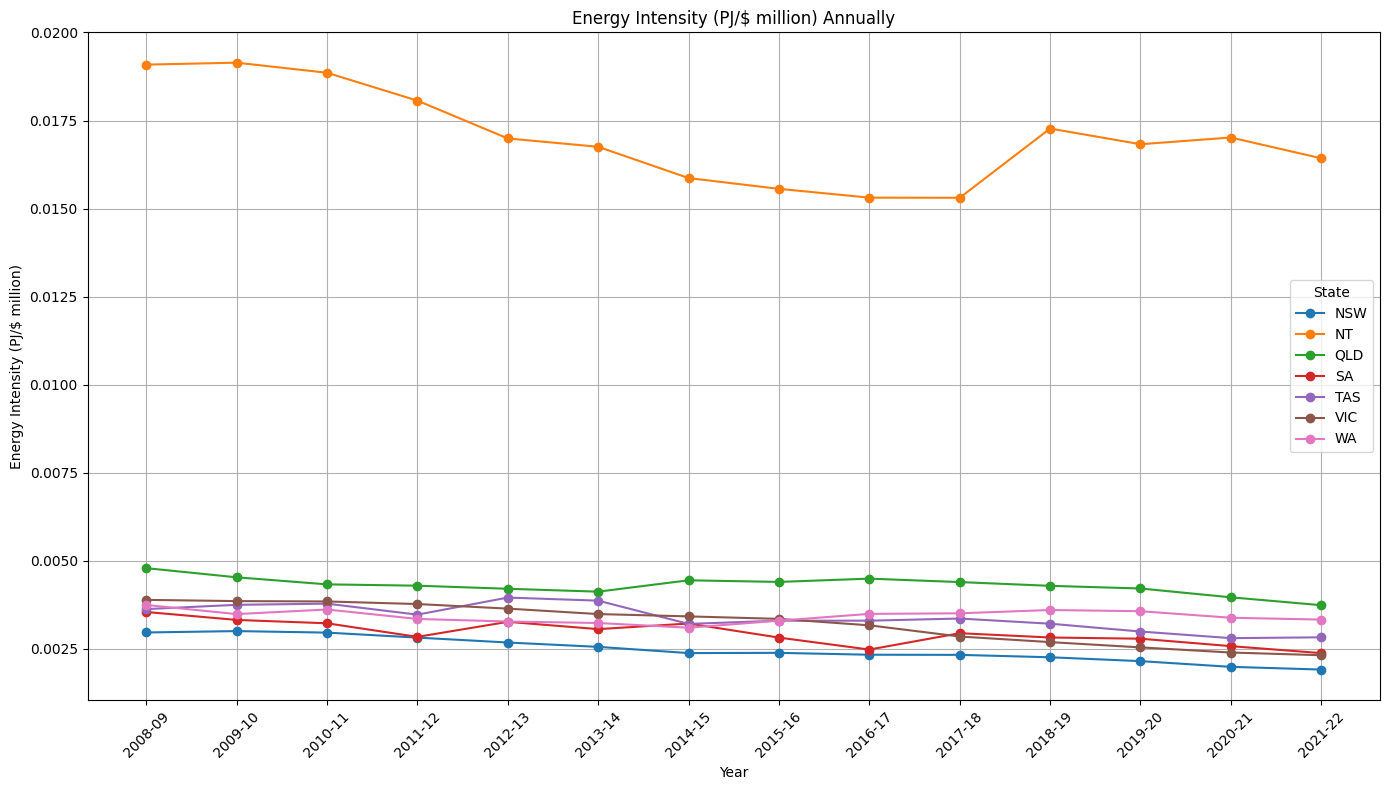

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains data
# Define a function to input energy column data
def input_energy_columns():
    Coal_PJ = []
    Oil_PJ = []
    Gas_PJ = []
    Renewables_PJ = []
    # Your code to input data into these lists goes here

# Define new energy consumption columns
energy_columns = ['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']

# Calculate annual energy consumption total
df['Total_Energy_Consumption'] = df[energy_columns].sum(axis=1)

# Group by state and year to calculate total energy consumption and average GSP
grouped = df.groupby(['State', 'Year']).agg({
    'Total_Energy_Consumption': 'sum',
    'GSP($ milion)': 'mean'
}).reset_index()

# Calculate energy intensity
grouped['Energy_Intensity'] = grouped['Total_Energy_Consumption'] / grouped['GSP($ milion)']

# Build a pivot table for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

# Plotting
plt.figure(figsize=(14, 8))

for state in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[state], marker='o', label=state)

plt.title('Energy Intensity (PJ/$ million) Annually')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (PJ/$ million)')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(True)

plt.tight_layout()
plt.show()


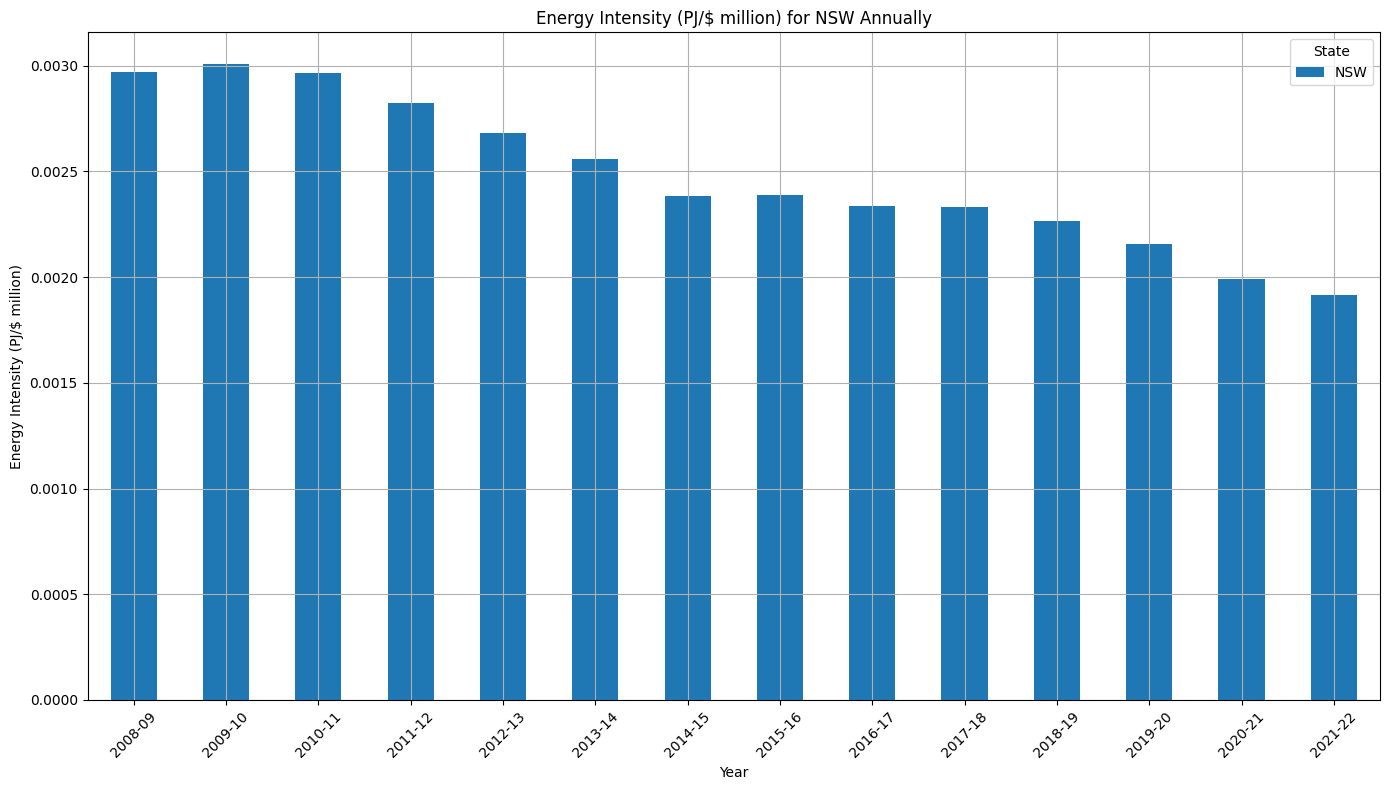

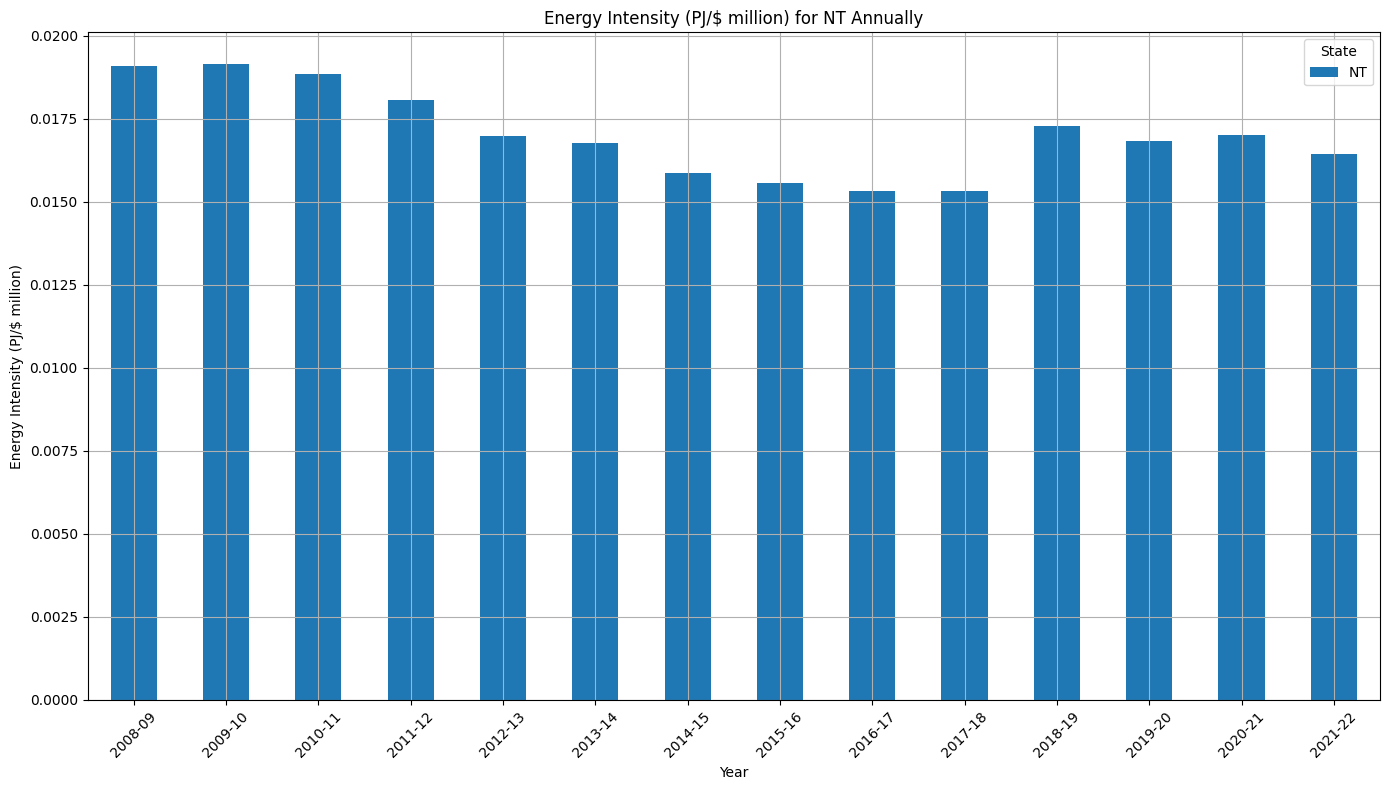

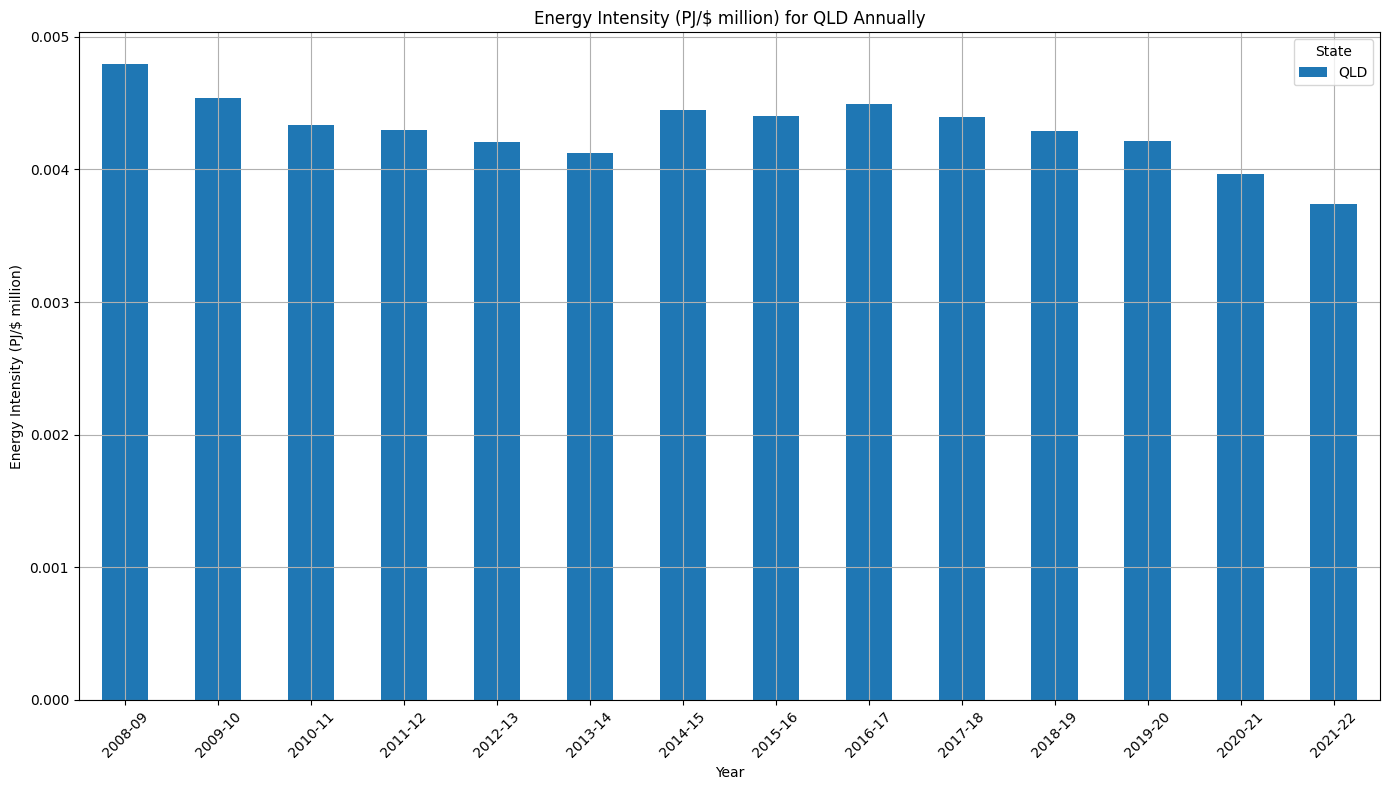

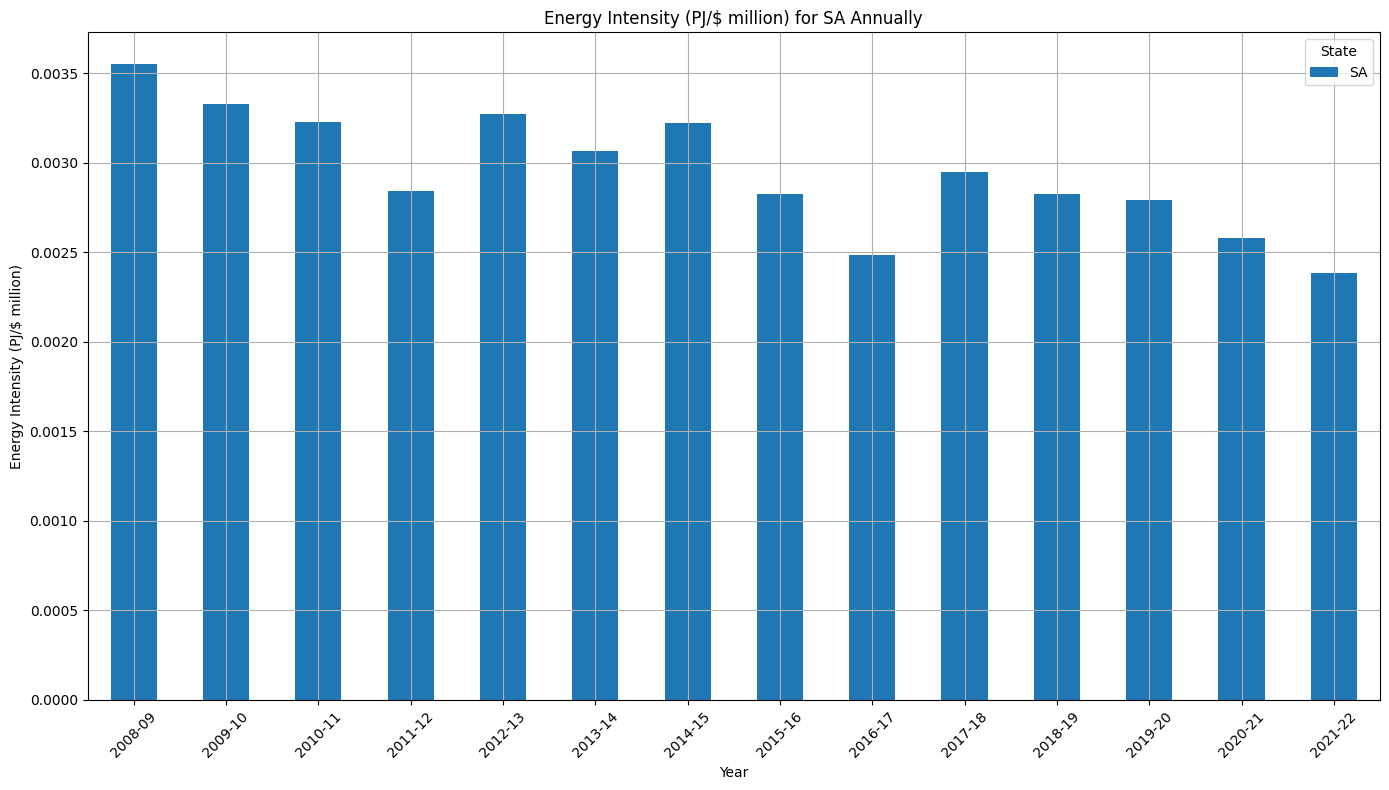

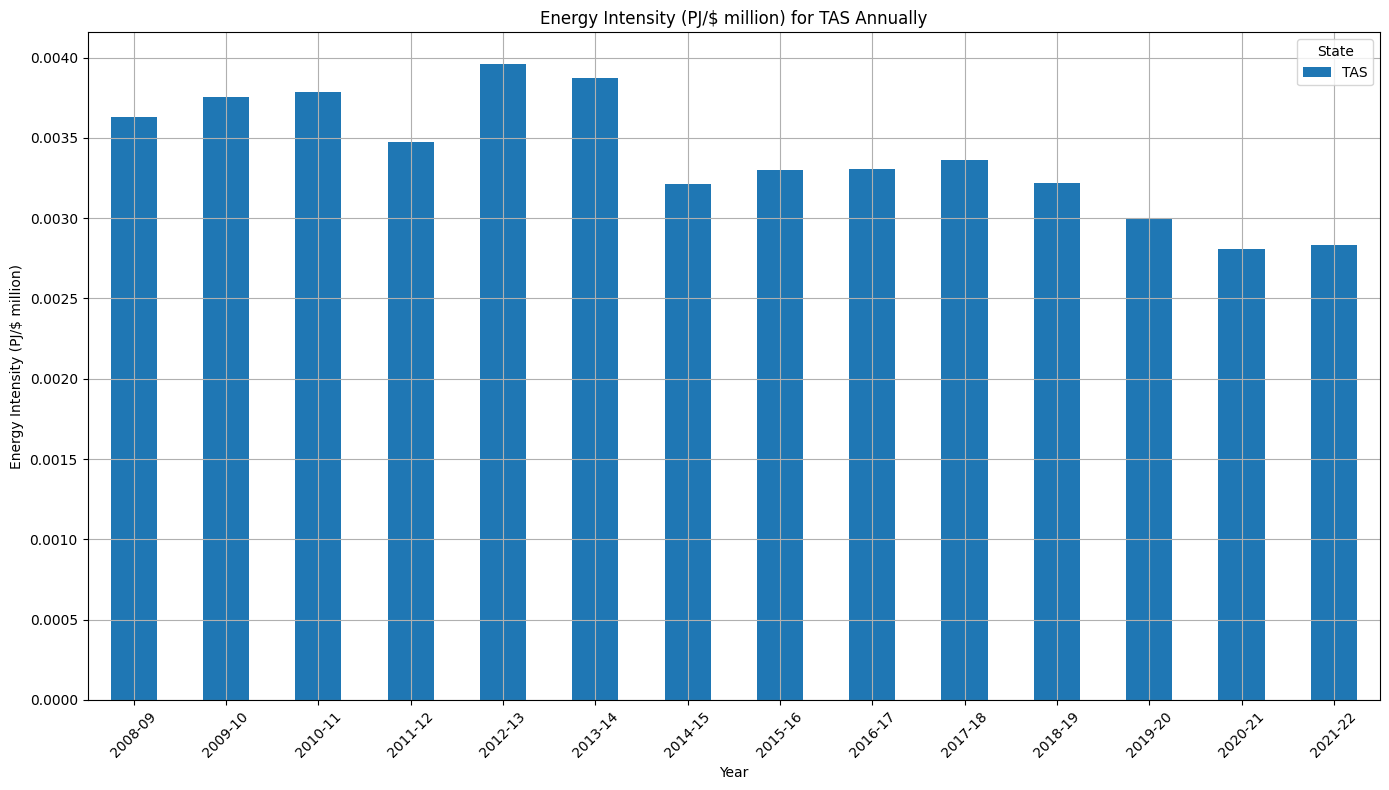

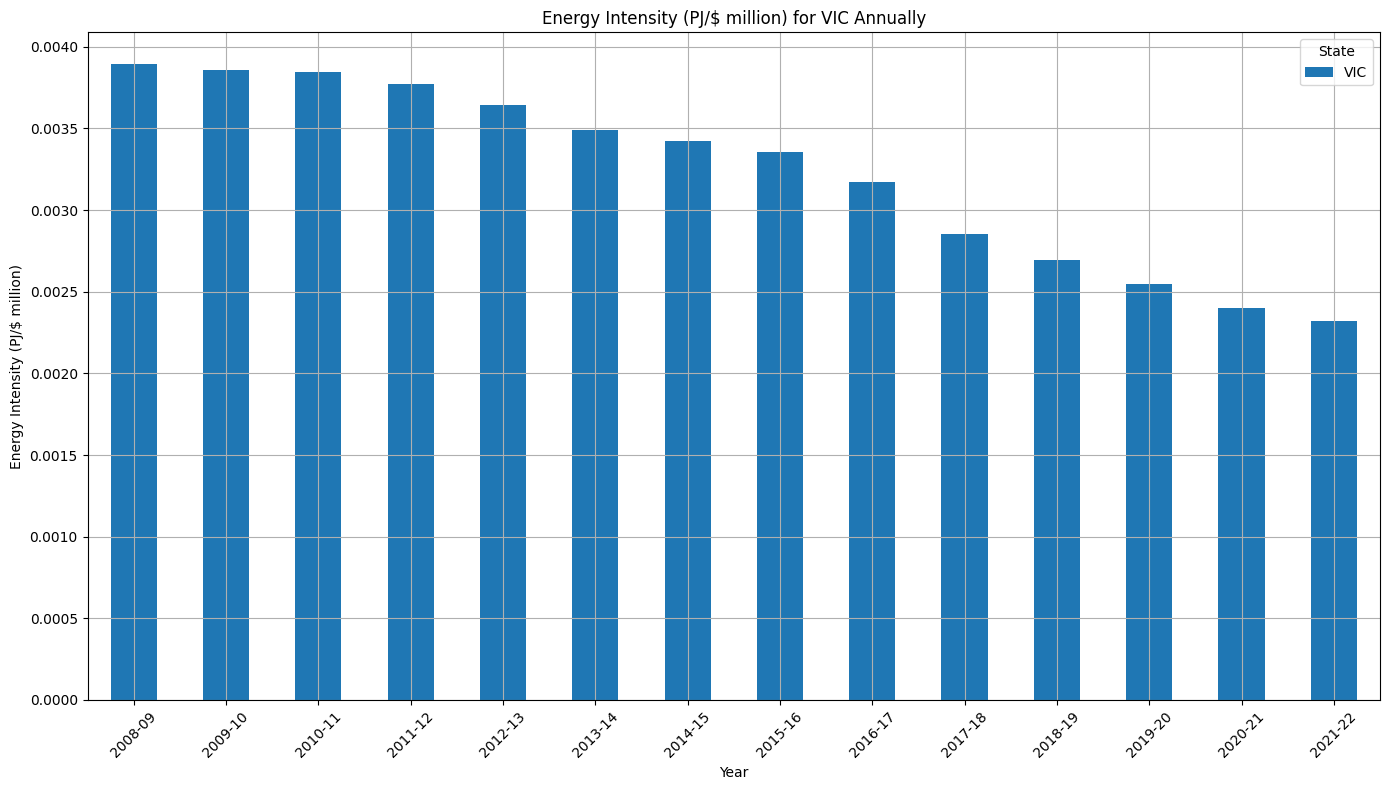

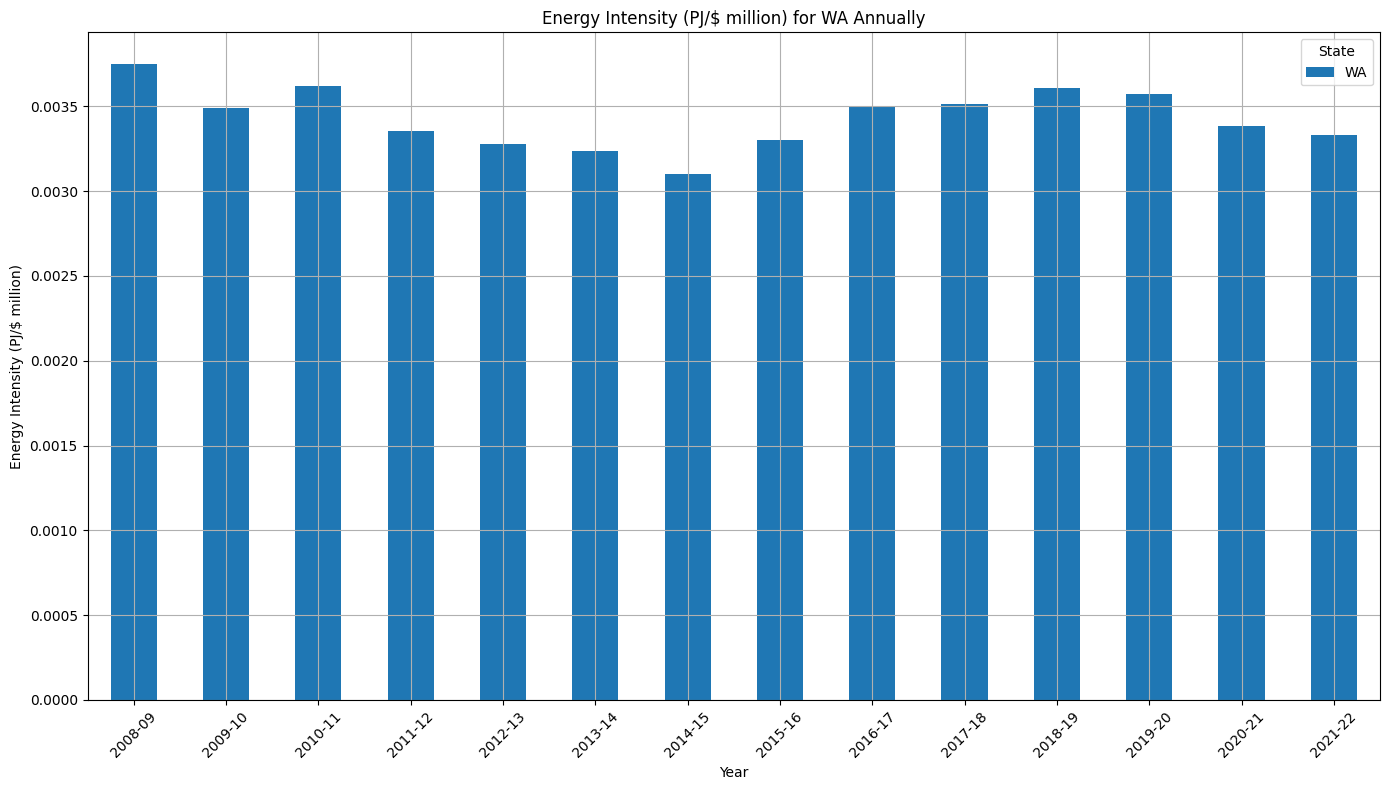

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains data
# Define a function to input energy column data
def input_energy_columns():
    Coal_PJ = []
    Oil_PJ = []
    Gas_PJ = []
    Renewables_PJ = []
    # Your code to input data into these lists goes here

# For demonstration purposes, let's assume energy data has been input and stored in respective lists

# Define new energy consumption columns
energy_columns = ['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']

# Calculate annual energy consumption total
df['Total_Energy_Consumption'] = df[energy_columns].sum(axis=1)

# Group by state and year to calculate total energy consumption and average GSP
grouped = df.groupby(['State', 'Year']).agg({
    'Total_Energy_Consumption': 'sum',
    'GSP($ milion)': 'mean'
}).reset_index()

# Calculate energy intensity
grouped['Energy_Intensity'] = grouped['Total_Energy_Consumption'] / grouped['GSP($ milion)']

# Build a pivot table for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

# Plotting
for state in pivot_table.columns:
    plt.figure(figsize=(14, 8))
    pivot_table[state].plot(kind='bar')

    plt.title(f'Energy Intensity (PJ/$ million) for {state} Annually')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (PJ/$ million)')
    plt.xticks(rotation=45)
    plt.legend([state], title='State')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


We drew the code according to the instructor, but an error was reported, so I asked chatgpt and it gave me this line of code.

### **chatgpt give answer:**

Pivot the data for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

Plotting
plt.figure(figsize=(10, 6)) pivot_table.plot(ax=plt.gca())`

chatgpt also give me this example help me understand

*If grouped contains data like this:*

*State Year Total_Energy_Consumption GSP($ milion) Energy_Intensity*

NSW 2020 100 50 2.0

NSW 2021 110 55 2.0

VIC 2020 120 60 2.0

VIC 2021 130 65 2.0

*After the pivot operation, pivot_table will look like this:*

Year NSW VIC

2020 2.0 2.0

2021 2.0 2.0

**You can also find the related functions and usage of this function on this website** https://www.geeksforgeeks.org/python-pandas-pivot_table/?ref=header_search

# Interpretation of Results

# Limitations and Recommendations

# Reflection on Python Notebooks

# Reflection on Gen AI

# Conclusion

# References

Bibliography

Rahman, Md Geaur and Md Zahidul Islam. 2016. "Missing Value Imputation using a Fuzzy Clustering-Based EM Approach." Knowledge and Information Systems 46 (2) (02): 389-422. doi:https://doi.org/10.1007/s10115-015-0822-y. https://www.proquest.com/scholarly-journals/missing-value-imputation-using-fuzzy-clustering/docview/1757515869/se-2.

Agbehadji, Israel Edem, Richard C. Millham, Simon James Fong, and Hongji Yang. 2018. "Bioinspired Computational Approach to Missing Value Estimation." Mathematical Problems in Engineering 2018: 16. doi:https://doi.org/10.1155/2018/9457821. https://www.proquest.com/scholarly-journals/bioinspired-computational-approach-missing-value/docview/1988139805/se-2.